# Age of the seafloor [20 points]

**Our goals:**
- Load and visualize global seafloor age.
- Use global seafloor age distribution to make inferences about plate tectonic processes.

## Setup

Run this cell to import the packages you will need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from cartopy import config
import cartopy.crs as ccrs

### Load Seafloor Age dataset [5 points total]

We will load the data as a Pandas dataframe.

- column 1 is longitude in degrees
- column 2 is latitude in degrees
- column 3 is seafloor age in million years

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

1. Use the `pd.read_csv` function to load the file `age.csv`, which is in `data`. Remember that we need to use **relative path** to the file.
2. Save this as the variable `seafloor_age_data`
3. Use `head` to print the first 5 lines

In [3]:
seafloor_age_data = pd.read_csv('data/age.csv')
seafloor_age_data.head(5)

,longitude,latitude,age_Ma
0,-180.0,90.0,55.569
1,-179.8,90.0,55.568
2,-179.6,90.0,55.568
3,-179.4,90.0,55.569
4,-179.2,90.0,55.569


Pandas dataframes are super useful and we will use them a lot. Watch this video for an introduction to the pandas library.

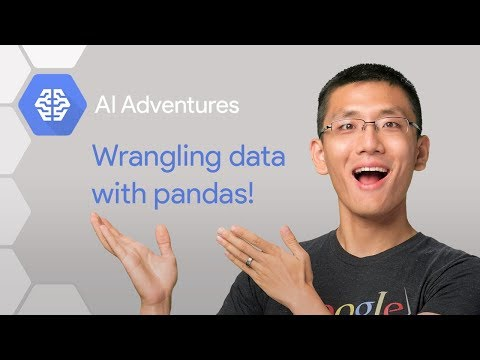

In [4]:
from IPython.display import YouTubeVideo
# Wrangling Data with Pandas
YouTubeVideo('XDAnFZqJDvI', width="1000", height="500")

As Yufeng introduced, the `.describe` function provides summary statistics on a dataframe. Our dataframe is called `seafloor_age_data`. Just like we applied the function `head` to the dataframe after we imported it as `seafloor_age_data.head()`, the function `.describe()` can be applied to the dataframe to get this summary. Do this in the cell below.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

In [5]:
#Apply the describe function to the data here
seafloor_age_data.describe()

,longitude,latitude,age_Ma
count,1.622701e+06,1.622701e+06,843805.000000
mean,-1.255480e-16,0.000000e+00,63.731686
std,1.039808e+02,5.201924e+01,45.219148
min,-1.800000e+02,-9.000000e+01,0.000000
25%,-9.000000e+01,-4.500000e+01,25.750000
50%,0.000000e+00,-4.996000e-15,54.981000
75%,9.000000e+01,4.500000e+01,97.539000
max,1.800000e+02,9.000000e+01,280.000000


<font color=red>**_Question_**</font> How old is the **oldest** and **youngest** seafloor. How does that compare with the age of the Earth? 

<font color=goldenrod>**_Write your answer here_**</font> **[2 points]**

<font color=blue> It appears that the oldest is 280 million years old to newly created. This is much younger than the age of the Earth, estimated to be closer to 4.5 billion years old.  </font>

### Plot a histogram of seafloor age [5 points for plot]

#### Access data in a single column

As Yufeng described in the video, the values of a particular column within a dataframe can be accessed using bracket notation. 

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Print the column `age_Ma`

In [7]:
print(seafloor_age_data['age_Ma'])

0          55.569
1          55.568
2          55.568
3          55.569
4          55.569
            ...  
1622696       NaN
1622697       NaN
1622698       NaN
1622699       NaN
1622700       NaN
Name: age_Ma, Length: 1622701, dtype: float64


This prints outs the values of the seafloor age in Ma. `NaN` means Not a Number. Think, why would some of the values be `NaN`? We'll come back to this later.

We can use `seafloor_age_data['age_Ma']` as input to a plot such as a histogram. In class, we plotted a histogram of global elevation. Here I want you to plot a histogram of seafloor age. Label the axes of your plot and give it a title.

<font color=goldenrod>**_Code for you to write_**</font> **[4 points]**

- Plot a histogram of `age_Ma`
- Add x and y-labels
- Add a title

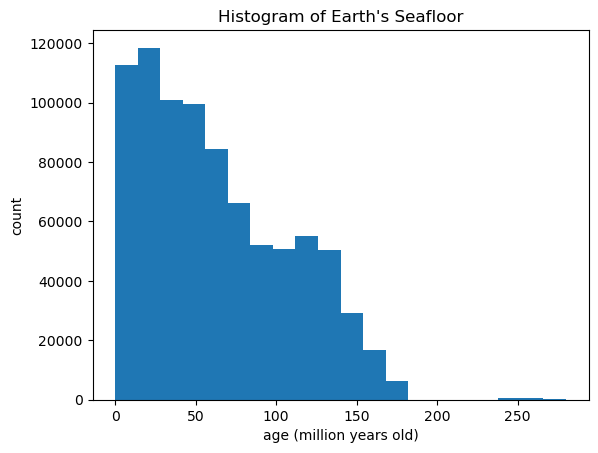

In [13]:
#Make a histogram here
plt.hist(seafloor_age_data['age_Ma'], bins=20, label='age')
plt.xlabel('age (million years old)')
plt.ylabel('count')
plt.title('Histogram of Earth\'s Seafloor')
plt.show()

Don't worry about the warnings regarding "invalid value encountered in...".

### Seafloor Age Map [8 points for map; 2 points for question responses]

Now let's make a map of the seafloor age. To help make the map, let's make the columns of the Pandas dataframe be numpy arrays. To do this we do `np.asarray(dataframe_name['column_name']`. Use this format but **use the correct dataframe_name and column_name**.

<font color=goldenrod>**_Code for you to write_**</font> **[3 points]**

Save the columns `longitude`, `latitude`, and `age` to the variables below.

In [16]:
longitude = np.asarray(seafloor_age_data['longitude'])
latitude = np.asarray(seafloor_age_data['latitude'])
age = np.asarray(seafloor_age_data['age_Ma'])

As we did in-class, we need to reshape of arrays of data into grids in order to map. 

<font color=goldenrod>**_Code for you to write_**</font> **[3 points]**

Use `reshape` to reshape the each array of `latitude`, `longitude`, and `age` into (901,1801) sized grids.

In [17]:
age_grid = age.reshape(901, 1801)
lon_grid = longitude.reshape(901, 1801)
lat_grid = latitude.reshape(901, 1801)

## Use the grids of latitude and longtitude you just made to plot a map of seafloor age.

Replace the `____` below in `plt.contourf` in order to make such a map.

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

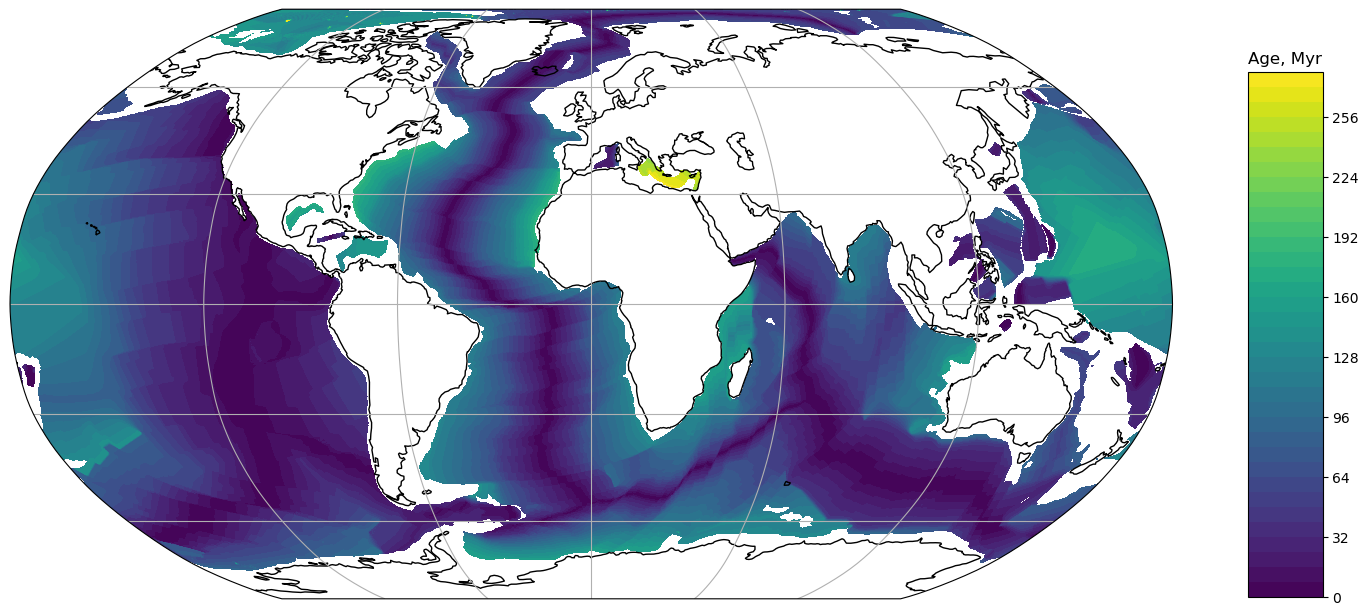

In [20]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
plt.contourf(lon_grid, lat_grid, age_grid, levels=40,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 
plt.title('Age, Myr'); 

plt.show()

<font color=red>**_Question_**</font> What patterns do you observe? **[1 point]** 

<font color=goldenrod>**_Write your answer here_**</font>

<font color=blue>I see that young areas are also areas previously identified as areas with seafloor spreading.</font>

<font color=red>**_Question_**</font> What are the white areas and (thinking back to earlier) what is the `Z` value (seafloor age in Ma) that gives this white colour? **[1 point]**

<font color=goldenrod>**_Write your answer here_**</font> 

<font color=blue>The white areas are continental crust and would be the **NaN** values from before.</font>

### Turn in this notebook

If you want this graded then save your completed notebook, print the file to PDF, and upload the PDF on Blackboard.